### CS 516 Medical Imaging
### Assignment 4
#### 002268087 Luyun Nie
#### 002268506 Junjia Lin

### Part 1: Segmentation by flood_fill

#### Image 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from skimage import morphology

In [2]:
img = nib.load('C:/Users/tina/Documents/Downloads/img1.nii.gz')

In [3]:
imgdata = img.get_data()
img_data = imgdata.copy()
img_size = imgdata.shape
print("The imagesize is:",img_size)

<ipython-input-3-c884f450a5ce>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  imgdata = img.get_data()


The imagesize is: (274, 384, 384)


Text(0.5, 1.0, 'Img1 Plot')

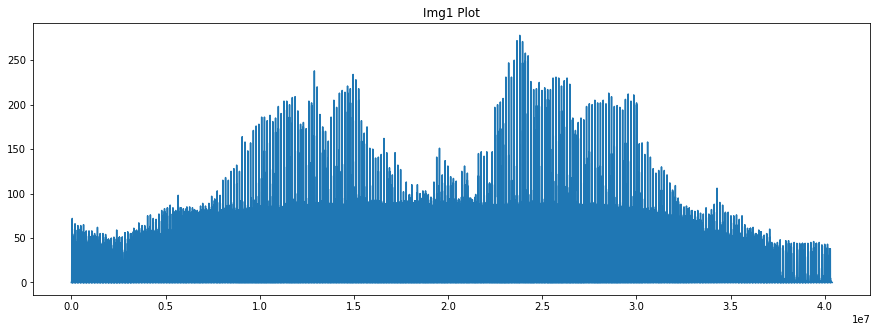

In [4]:
plt.figure(figsize = (15,5))
plt.plot(img_data.ravel())
plt.title("Img1 Plot")

In [5]:
from skimage import filters
thresholds = filters.threshold_multiotsu(img_data)
print("Theresholds are:",thresholds)

Theresholds are: [16 47]


Note: from the plot we observed that the general volume of img1 is mostly between 0 and 100. To classify the plot by intensity, we introduced a multy otsu method to find ranges of each class.

In [6]:
img_data[img_data <= thresholds[0]]= 0
img_data[(img_data> thresholds[0])&(img_data <= thresholds[1])]= 2
img_data[img_data> thresholds[1]] = 1
img_gm = img_data==2
img_wm = img_data==1
img_bg = img_data==0

Note:after that we label each part of the raw data. The white mater is labeled by 1 and the gray matter is labeled by 2. The background is 0.

Text(0.5, 1.0, 'White Matter')

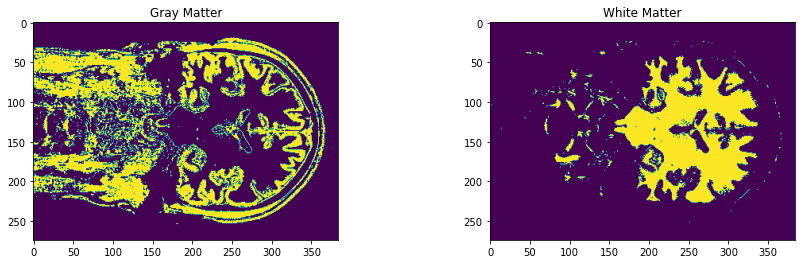

In [7]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.imshow(img_gm[:,173,:])
plt.title('Gray Matter')
plt.subplot(1,2,2)
plt.imshow(img_wm[:,173,:])
plt.title('White Matter')

In [8]:
img_gwm = morphology.erosion(img_wm+img_gm,morphology.ball(3))
img_ff = morphology.flood_fill(img_gwm.astype(float), (175,173,277), new_value=10,tolerance=0.5)

Note:We randomly choose a point from the white matter to apply a flood fill algorightm. The purpose of the method is to perform a flood filling on this 3d image.

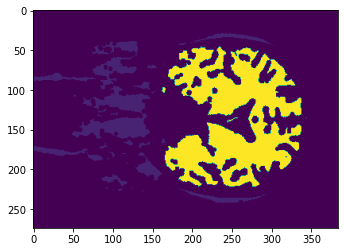

In [9]:
plt.imshow(img_ff[:,200,:])

Note: After applying this method, the white matter also the gray matter have been gathered without the head bone and the neck. Next, we would continue to extract the brain voxel by voxel.

In [10]:
label_idx = np.argwhere(img_ff ==10)
print('The total number of brain voxel:',label_idx.shape)

The total number of brain voxel: (3081799, 3)


In [11]:
newimg_data = np.zeros((img_size[0],img_size[1],img_size[2]))
for i in range(label_idx.shape[0]):
    x = int(label_idx[i][0])
    y = int(label_idx[i][1])
    z = int(label_idx[i][2])
    newimg_data[x,y,z] = imgdata[x,y,z]

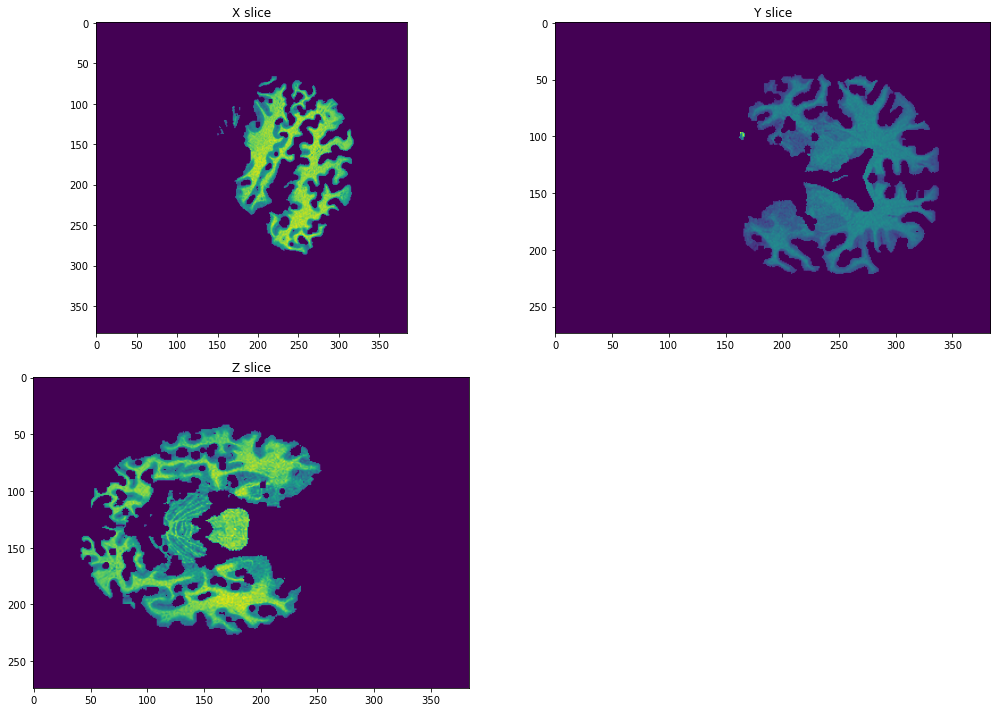

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(newimg_data[200,:,:])
plt.title('X slice')
plt.subplot(2,2,2)
plt.imshow(newimg_data[:,200,:])
plt.title('Y slice')
plt.subplot(2,2,3)
plt.imshow(newimg_data[:,:,200])
plt.title('Z slice')
plt.tight_layout()

In [13]:
newimg1nii = nib.Nifti1Image(newimg_data,img.affine)
nib.save(newimg1nii,'C:/Users/tina/Documents/Downloads/newimg1.nii.gz')

#### Image 2

In [14]:
img2 = nib.load('C:/Users/tina/Documents/Downloads/img2.nii.gz')
img2data = img2.get_data()
img2_data = img2data.copy()
img2_size = img2data.shape
thresholds2 = filters.threshold_multiotsu(img2_data)

<ipython-input-14-cf09f66f0172>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img2data = img2.get_data()


In [15]:
img2_data[img2_data <= thresholds2[0]]= 0
img2_data[(img2_data> thresholds[0])&(img_data <= thresholds[1])]= 2
img2_data[img2_data> thresholds[1]] = 1
img2_gm = img2_data==2
img2_wm = img2_data==1
img2_bg = img2_data==0

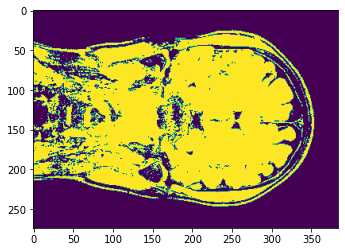

In [16]:
plt.imshow(img2_data[:,200,:])

In [17]:
img2_gwm = morphology.erosion(img2_wm+img2_gm,morphology.ball(3))
img2_ff = morphology.flood_fill(img2_gwm.astype(float), (100,173,250), new_value=10,tolerance=0.5)

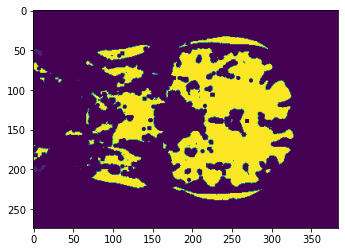

In [18]:
plt.imshow(img2_ff[:,200,:])

In [19]:
label2_idx = np.argwhere(img2_ff ==10)
newimg2_data = np.zeros((img2_size[0],img2_size[1],img2_size[2]))
for i in range(label2_idx.shape[0]):
    x = int(label2_idx[i][0])
    y = int(label2_idx[i][1])
    z = int(label2_idx[i][2])
    newimg2_data[x,y,z] = img2data[x,y,z]

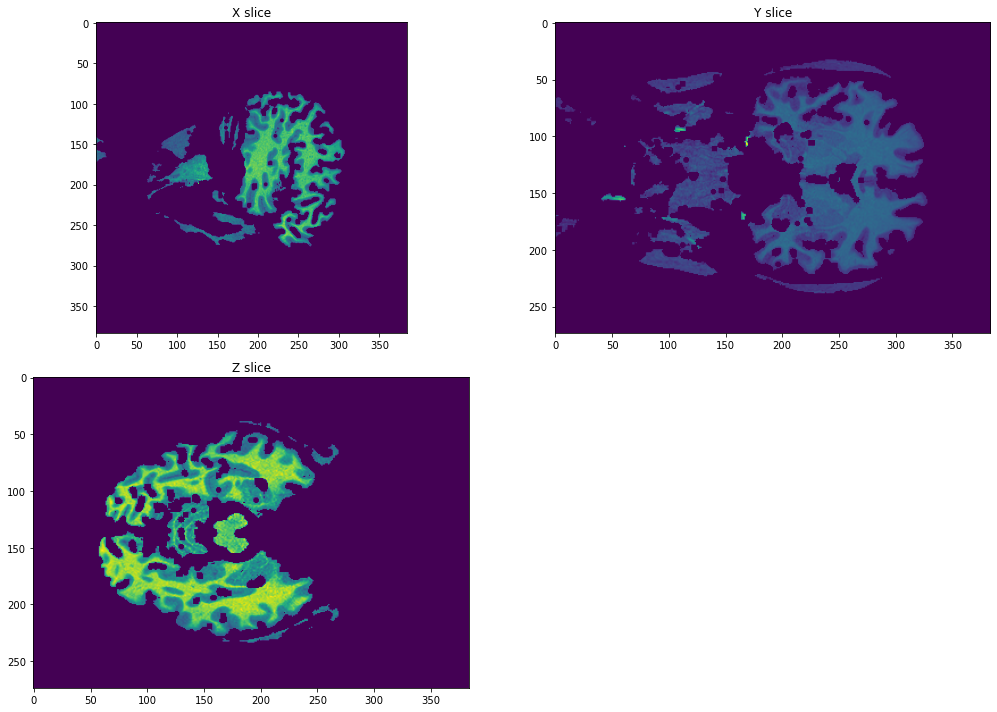

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(newimg2_data[200,:,:])
plt.title('X slice')
plt.subplot(2,2,2)
plt.imshow(newimg2_data[:,200,:])
plt.title('Y slice')
plt.subplot(2,2,3)
plt.imshow(newimg2_data[:,:,200])
plt.title('Z slice')
plt.tight_layout()

#### Image 3

In [21]:
img3 = nib.load('C:/Users/tina/Documents/Downloads/img3.nii.gz')
img3data = img3.get_data()
img3_data = img3data.copy()
img3_size = img3data.shape
thresholds3 = filters.threshold_multiotsu(img3_data)

<ipython-input-21-36edefbaa159>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img3data = img3.get_data()


In [22]:
img3_data[img3_data <= thresholds3[0]]= 0
img3_data[(img3_data> thresholds3[0])&(img_data <= thresholds3[1])]= 2
img3_data[img3_data> thresholds3[1]] = 1
img3_gm = img3_data==2
img3_wm = img3_data==1
img3_bg = img3_data==0

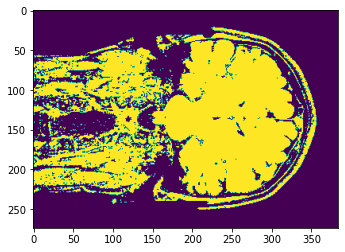

In [23]:
plt.imshow(img3_data[:,173,:])

In [24]:
img3_gwm = morphology.erosion(img3_wm+img3_gm,morphology.ball(3))
img3_ff = morphology.flood_fill(img3_gwm.astype(float), (150,173,273), new_value=10,tolerance=0.5)

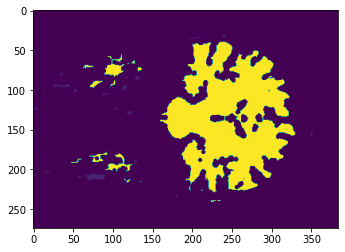

In [25]:
plt.imshow(img3_ff[:,173,:])

In [26]:
label3_idx = np.argwhere(img3_ff ==10)
newimg3_data = np.zeros((img3_size[0],img3_size[1],img3_size[2]))
for i in range(label3_idx.shape[0]):
    x = int(label3_idx[i][0])
    y = int(label3_idx[i][1])
    z = int(label3_idx[i][2])
    newimg3_data[x,y,z] = img3data[x,y,z]

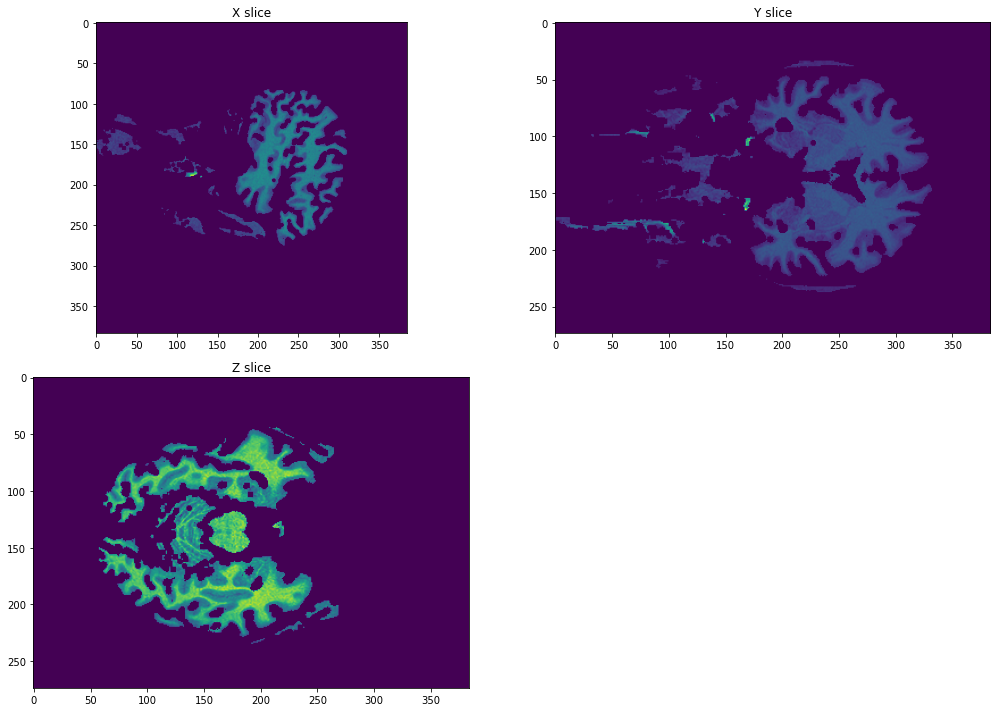

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(newimg3_data[200,:,:])
plt.title('X slice')
plt.subplot(2,2,2)
plt.imshow(newimg3_data[:,200,:])
plt.title('Y slice')
plt.subplot(2,2,3)
plt.imshow(newimg3_data[:,:,200])
plt.title('Z slice')
plt.tight_layout()

Note: By applying this method, we found that there would be huge information elimiation by classify the head by intensity. Some gray matter had been erased by low intensity. Also, choosing a correct seed point is the most essential thing that a wrong seed point would lead to neck extraction or head-bone extraction.

### Part 2: Multi-model Segmentation

In [28]:
t1 = nib.load('C:/Users/tina/Documents/Downloads/img1.nii.gz')
t2 = nib.load('C:/Users/tina/Documents/Downloads/t2.nii.gz')
t1data = t1.get_data()
t2data = t2.get_data()

<ipython-input-28-0bec488ebba2>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  t1data = t1.get_data()
<ipython-input-28-0bec488ebba2>:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  t2data = t2.get_data()


Text(0.5, 1.0, 'T2')

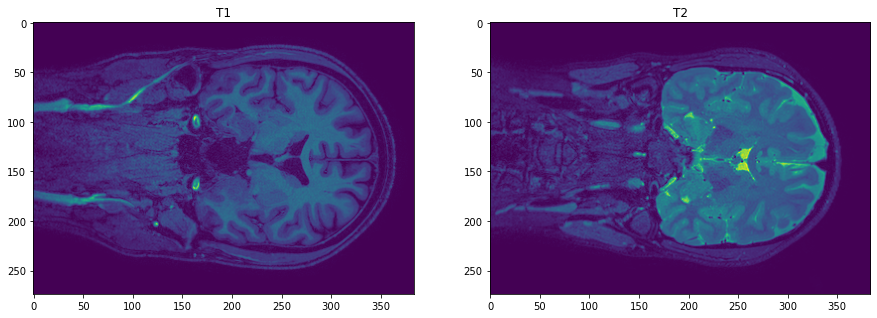

In [29]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.imshow(t1data[:,200,:])
plt.title('T1')
plt.subplot(1,2,2)
plt.imshow(t2data[:,200,:])
plt.title('T2')

Note: Plotting the two images, we found that the T2 brain has been highlighted.

In [30]:
feature1 = t1data.ravel()
feature2 = t2data.ravel()
features = np.transpose([feature1,feature2])

In [31]:
features

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

Note: the features stand for corresponding points volumes

In [32]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters = 5)
kmeans = kmeans.fit(features)

In [33]:
labels = kmeans.labels_
labels = np.reshape(labels,(t1data.shape[0],t1data.shape[1],t1data.shape[2]))

Text(0.5, 1.0, 'Compoment 4')

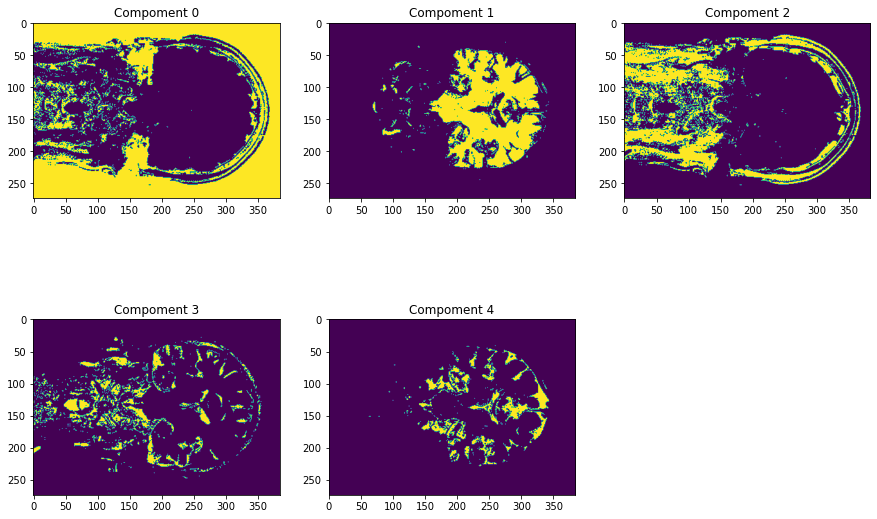

In [34]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
plt.imshow(labels[:,173,:]==0)
plt.title('Compoment 0')
plt.subplot(2,3,2)
plt.imshow(labels[:,173,:]==1)
plt.title('Compoment 1')
plt.subplot(2,3,3)
plt.imshow(labels[:,173,:]==2)
plt.title('Compoment 2')
plt.subplot(2,3,4)
plt.imshow(labels[:,173,:]==3)
plt.title('Compoment 3')
plt.subplot(2,3,5)
plt.imshow(labels[:,173,:]==4)
plt.title('Compoment 4')

In [35]:
index_1= np.argwhere(labels==1).astype(int)
index_3 = np.argwhere(labels==3).astype(int)
index = np.concatenate((index_1,index_3))
multi_data = np.zeros((t1data.shape[0],t1data.shape[1],t1data.shape[2]))
for i in range(index.shape[0]):
    x = int(index[i][0])
    y = int(index[i][1])
    z = int(index[i][2])
    multi_data[x,y,z] = t1data[x,y,z]

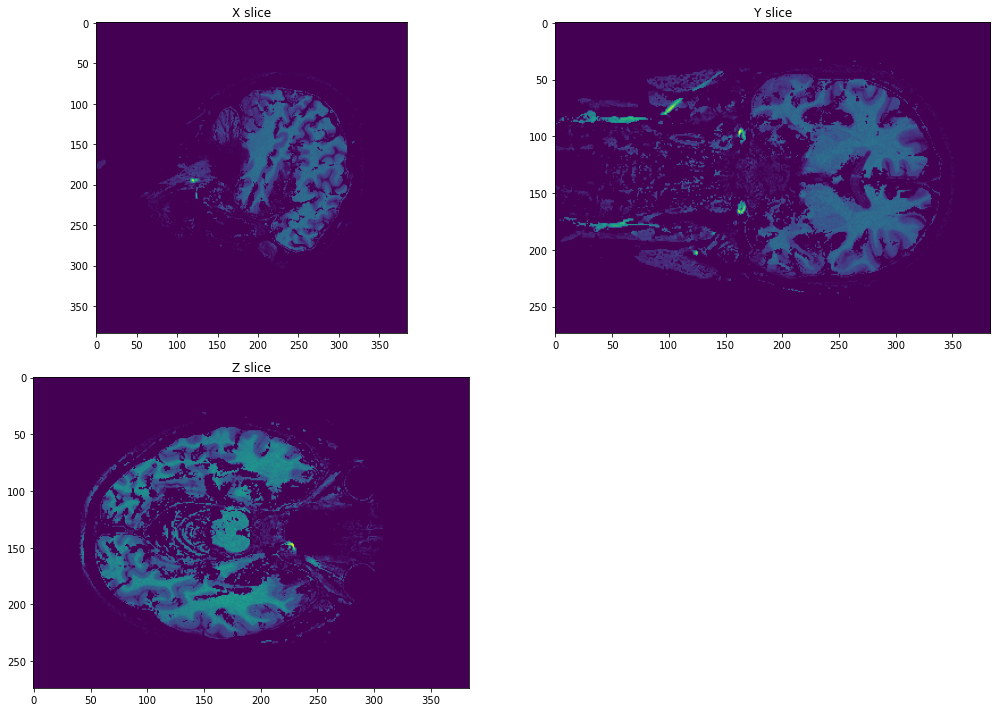

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(multi_data[200,:,:])
plt.title('X slice')
plt.subplot(2,2,2)
plt.imshow(multi_data[:,200,:])
plt.title('Y slice')
plt.subplot(2,2,3)
plt.imshow(multi_data[:,:,200])
plt.title('Z slice')
plt.tight_layout()

In [37]:
multi_t1t2 = nib.Nifti1Image(multi_data,t1.affine)
nib.save(multi_t1t2,'C:/Users/tina/Documents/Downloads/multi_t1t2.nii.gz')

Note: In this way, the gray matter cortex is preserved to the greatest extent. Actually, the t2 highlighted brain provided a proof for the kmeans method to find correct features. However, this method has an disadvantage that the labels are not static that a correction of component need to be operated.